In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

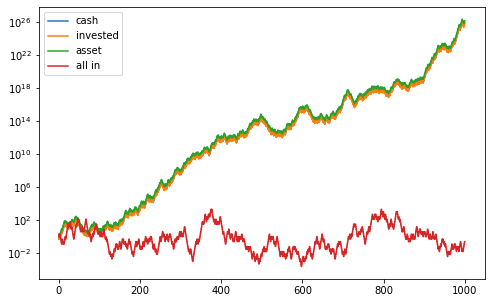

In [3]:
def invest_simulation(n_trial=100,r_cash=0.5,reward=[2,0.5]):
    cash = [0]*(2*n_trial+1)
    cash[0] = r_cash
    invested = [0]*(2*n_trial+1)
    invested[0] = 1-r_cash
    asset = [0]*(2*n_trial+1)
    asset[0] = 1
    
    all_in = [0]*(2*n_trial+1)
    all_in[0] = 1
    for i in range(n_trial):
        invested[2*i+1] = invested[2*i]*rd.choice(reward)
        cash[2*i+1] = cash[2*i]
        asset[2*i+1] = invested[2*i+1] + cash[2*i+1]
        
        invested[2*i+2] = asset[2*i+1]*(1-r_cash)
        cash[2*i+2] = asset[2*i+1]*(r_cash)
        asset[2*i+2] = asset[2*i+1]
        
        all_in[2*i+1] = all_in[2*i]*rd.choice([0.5,2])
        all_in[2*i+2] = all_in[2*i+1]
    return np.array([cash, invested, asset, all_in]).T


def shannon_plot(n_trial=100,r_cash=0.5,reward=[2,0.5]):
    plt.figure(figsize=(8,5))
    plt.plot(np.linspace(0,n_trial,2*n_trial+1),invest_simulation(n_trial,r_cash,reward))
    plt.legend(['cash', 'invested', 'asset','all in'])
    plt.yscale('log')

shannon_plot(1000,r_cash=0.5)